## Mathematical model
Product rule
$$ p(X,Z,\theta) = p(X|Z,\theta)p(Z|\theta)p(\theta) = p(Z|\theta,X)p(\theta|X)p(X) $$

Bayes rule
$$ p(Z|\theta,X)p(\theta|X) = \dfrac{p(X|Z,\theta)p(Z|\theta)p(\theta)}{p(X)} $$

$$ p(Z|\pi,X)p(\mu|X)p(\eta|X)p(\pi|X) = \dfrac{p(X|Z,\mu,\eta)p(Z|\pi)p(\mu)p(\eta)p(\pi)}{p(X)} $$

Likelihood
$$ p(X|Z,\mu,\eta) = \prod_f p(X_f|Z_f,\mu,\eta) = \prod_f \prod_{ij} p(X_{fij}|Z_f,\mu,\eta) = \prod_f \prod_{ij} Noise(X_{fij}|Z_f,\mu,\eta) $$

where $\mu$ is a spot model
$$ \mu(height_k,width_k,x_k,y_k,background) $$

Prior
$$ p(Z|\theta) = \prod_f p(Z_f|\theta) = \prod_f Categorical(Z_f|\pi) = \prod_f \prod_k \pi_k^{Z_{fk}} $$

Posterior
$$ p(\theta|X) $$

$$ p(Z|X,\theta) = \prod_f p(Z_f|X_f,\theta) $$

where
$$ \theta = \mu \cup \eta \cup \pi $$

$$ p(D,b,m,\theta,h,w,x_0,y_0) = p(b)p(m)p(\theta|m)p(h|m)p(w|m)p(x_0|m,\theta)p(y_0|m,\theta)p(D|b,h,w,x_0,y_0,gain,offset) $$

### Model
$$ p = p(b)p(m)p(\theta|m)p(h|m)p(w|m)p(x|m,\theta)p(y|m,\theta)p(D|b,h,w,x,y) $$ 

$$ = \prod_{n,f} p(b_{n,f})p(m_{n,f})p(\theta_{n,f}|m_{n,f}) $$

$$ \prod_{k} p(h_{n,f,k}|m_{n,f})p(w_{n,f,k}|m_{n,f})p(x_{n,f,k}|m_{n,f},\theta_{n,f})p(y_{n,f,k}|m_{n,f},\theta_{n,f}) $$

$$ \prod_{x,y} p(D_{n,f,x,y}|b_{n,f},h_{n,f,k},w_{n,f,k},x_{n,f,k},y_{n,f,k},gain,offset) $$

### Guide

$$ q = q(b)q(m)q(\theta|m)q(h)q(w)q(x|m)q(y|m) $$

$$ = \prod_{n,f} q(b_{n,f})q(m_{n,f})q(\theta_{n,f}|m_{n,f}) $$

$$ \prod_{k} q(h_{n,f,k}|m_{n,f})q(w_{n,f,k}|m_{n,f})q(x_{n,f,k}|m_{n,f})q(y_{n,f,k}|m_{n,f}) $$

$$ p(x,z,\mu,\sigma, \pi) = p(x|z,\mu,\sigma)p(z|\pi)p(\mu)p(\sigma)p(\pi) $$

$$ \prod_n \prod_f p(x_{nf}|z_{nf},\mu_{nf},\sigma)p(z_{nf}|\pi)p(\mu_{nf})p(\sigma)p(\pi) $$

$$ p(x|z,\mu,\sigma) = \prod_n \prod_f p(x_{nf}|\mu_{nf}[z_f],\sigma) $$

$$ p(z|\pi) = \prod_n \prod_f \pi[z_{nf}] $$

### Spot model
$$ \mu_{fij}(Z_f,height_k,width_k,x_k,y_k,background) $$

$$ p(\mu|X) \simeq q(background) \prod_k q(height_k) q(width_k) q(x_k) q(y_k) $$

$$ q(height_k) = Normal(height\_loc_k, height\_scale_k) $$

$$ q(background) = Normal(background\_loc, background\_scale) $$

$$ q(width_k) = Delta(w_k) $$

$$ q(x_k) = Delta(x_k) $$

$$ q(y_k) = Delta(y_k) $$

### Noise model (Likelihood)

$$ p(X_{fij}|Z_f,\mu,\eta) = Gamma(X_{fij}-offset|\alpha_{fij}, \beta_{fij})Delta(offset) $$
where
$$ \alpha_{fij} = \dfrac{\mu_{fij}(Z_f,\theta)}{gain}; \beta_{fij} = \dfrac{1}{gain} $$

$$ \eta = \{gain, offset\} $$

$$ p(\eta|X) \simeq q(gain) q(offset) = Delta(g)Delta(o) $$

### Classification

$$ p(\pi|X) = q(\pi) =  Dirichlet(\rho_1,...,\rho_K) $$


$$ p(Z_f|X_f,\pi) = q(Z_f) = Categorical(Z_f|z\_prob_f) = \prod_k z\_prob_{fk}^{Z_{fk}} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

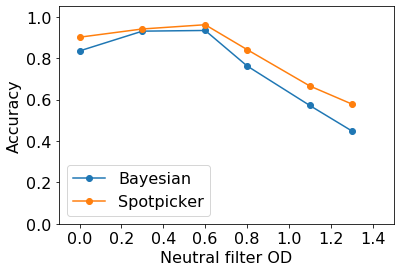

In [3]:
od = [0., 0.3, 0.6, 0.8, 1.1, 1.3]
bayes_mcc = [0.8349, 0.9303, 0.9336, 0.7625, 0.5713, 0.449]
sp_mcc = [0.9011, 0.9408, 0.9613, 0.8414, 0.6655, 0.5787]
#tpr = [0.98, 0.925, 0.72, 0.252]
#tnr = [0.993, 0.996, 0.995, 0.999]

plt.figure(figsize=(6,4))
plt.plot(od, bayes_mcc, marker="o", label="Bayesian")
plt.plot(od, sp_mcc, marker="o", label="Spotpicker")
#plt.plot(od, tpr, marker="o", label="TPR")
#plt.plot(od, tnr, marker="o", label="TNR")
plt.xlabel("Neutral filter OD", size=16)
plt.ylabel("Accuracy", size=16)
plt.xlim(-0.1, 1.5)
plt.ylim(0, 1.05)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [27]:
import graphviz

d = graphviz.Graph()

d.node("m", shape="circle")

d.node("theta", label="<&theta;>", shape="circle")

with d.subgraph() as s:
    s.attr(rank="same")
    d.node("p_b", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
    d.node("p_h", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
    d.node("p_w", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
    d.node("p_x", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")

with d.subgraph() as s:
    s.attr(rank='same')
    s.node("b", shape="circle")
    s.node("h", shape="circle")
    s.node("w", shape="circle")
    s.node("x", shape="circle")

d.node("mu", shape="diamond", label="<&mu;>")
d.node("p_D", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
d.node("D", shape="circle")

d.edge("p_b", "b")
d.edge("p_h", "h")
d.edge("p_w", "w")
d.edge("p_x", "x")

d.edge("m", "theta")
d.edge("theta", "w")
d.edge("theta", "x")
d.edge("b", "mu")
d.edge("h", "mu")
d.edge("w", "mu")
d.edge("x", "mu")
d.edge("mu", "p_D")
d.edge("p_D", "D")
#d.edges(['hmu', 'wmu', 'x-ymu'])

d.view()

'Graph.gv.pdf'

In [28]:
import graphviz

d = graphviz.Graph()

with d.subgraph() as g:
    g.attr(rank="same")
    g.node("h_mean", label="<&mu;<sub>h</sub>>", shape="plain")
    g.node("h_beta", label="<&beta;<sub>h</sub>>", shape="plain")
    g.node("x_mode", label="<&mu;<sub>x</sub>=0>", shape="plain")
    g.node("x_size", label="<&sigma;<sub>x</sub>=[2, 280]>", shape="plain")
    g.node("w_mode", label="<&mu;<sub>w</sub>>", shape="plain")
    g.node("w_size", label="<&sigma;<sub>w</sub>>", shape="plain")
    g.node("gain", label="gain", shape="plain")
    g.node("offset", label="offset", shape="plain")

    with d.subgraph(name="clusterN") as n:
        n.attr(label="N")
        #n.node("p_b", shape="point")
        with n.subgraph(name="clusterF") as f:
            f.node("p_h", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
            f.node("p_w", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
            f.node("p_x", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
            f.node("p_b", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
            f.node("p_m", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
            f.node("p_theta", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
    
            f.attr(rank="same", label="F")
            f.node("b", shape="circle")
            f.node("m", shape="circle")
            f.node("theta", label="<&theta;>", shape="circle")
            with f.subgraph(name="clusterK") as k:
                k.attr(rank="same", label="K")
                k.node("h", shape="circle")
                k.node("w", shape="circle")
                k.node("x", shape="circle")
            f.node("mu", shape="diamond", label="<&mu;>")
            f.node("p_D", label="", fixedsize="shape", shape="box", height="0.15", width="0.15", style="filled", fillcolor="black")
            f.node("D", shape="circle")

d.edge("h_mean", "p_h")
d.edge("h_beta", "p_h")
d.edge("x_mode", "p_x")
d.edge("x_size", "p_x")
d.edge("w_mode", "p_w")
d.edge("w_size", "p_w")
            
d.edge("p_m", "m")
d.edge("m", "p_theta")
d.edge("p_theta", "theta")
d.edge("theta", "p_x")
d.edge("theta", "p_w")
d.edge("p_b", "b")
d.edge("p_h", "h")
d.edge("p_w", "w")
d.edge("p_x", "x")

d.edge("b", "mu")
d.edge("h", "mu")
d.edge("w", "mu")
d.edge("x", "mu")
d.edge("mu", "p_D")
d.edge("p_D", "D")
d.edge("gain", "p_D")
d.edge("offset", "p_D")


#d.edges(['hmu', 'wmu', 'x-ymu'])

d.view()

'Graph.gv.pdf'